In [31]:
from pylab import *
from netCDF4 import Dataset
import netCDF4
import os 
import numpy as np
import ease2conv as e2

In [25]:
path = os.getcwd()
path 

'/Users/williamnorris/Team_GISProg'

In [26]:
def get_xy(ll_ul, ll_lr):
    N6 = e2.Ease2Transform("EASE2_N6.25km")
    N3 = e2.Ease2Transform("EASE2_N3.125km")
    # get x,y for 6.25
    row, col = N6.geographic_to_grid(ll_ul[0], ll_ul[1])
    x6ul, y6ul = N6.grid_to_map(row,col)
    row, col = N6.geographic_to_grid(ll_lr[0], ll_lr[1])
    x6lr, y6lr = N6.grid_to_map(row, col)
    # get x,y for 3.125
    row, col = N6.geographic_to_grid(ll_ul[0], ll_ul[1])
    x3ul, y3ul = N6.grid_to_map(row, col)
    row, col = N6.geographic_to_grid(ll_lr[0], ll_lr[1])
    x3lr, y3lr = N6.grid_to_map(row, col)
    list_6 = [x6ul, y6ul, x6lr, y6lr]
    list_3 = [x3ul, y3ul, x3lr, y3lr]
    return list_3, list_6

In [27]:
up_left = [62.27, -140.17]

# lower right 
low_right = [73,64, -166.08]

list3, list6 = get_xy(up_left, low_right)

In [28]:
print(list6)

[-1963074.6715945164, 2353648.404104936, 1699881.5994287431, -829087.6527448576]


In [34]:
f = netCDF4.Dataset(path + '/all_days_19H.nc')

In [47]:
#upper left 
lat_bounds = [62.27, -140.17]

# lower right 
lon_bounds =[73.64, -166.08]

lats = f.variables['x'][:]
lons = f.variables['y'][:]

latli = np.argmin(np.abs(lats - list6[0]))
latui = np.argmin(np.abs(lats - list6[2]))

lonli = np.argmin(np.abs(lons - list6[1]))
lonui = np.argmin(np.abs(lons - list6[3]))

subset = f.variables['TB'][:, lonli:lonui, latli:latui]

In [48]:
print(f.variables['x'])

<class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    standard_name: projection_x_coordinate
    coverage_content_type: coordinate
    long_name: x
    units: meters
    axis: X
    valid_range: [-9000000.  9000000.]
unlimited dimensions: 
current shape = (244,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [49]:
np.shape(subset)

(8766, 93, 243)

In [50]:
swe_image = subset[1, :, : ]

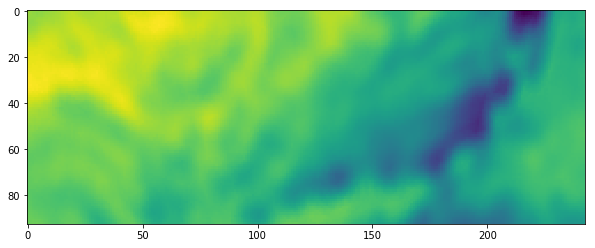

In [51]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.imshow(swe_image)